In [2]:
# 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명? [프로젝트]

In [3]:
# 2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [4]:
# (1) 데이터 가져오기

In [5]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [2]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [7]:
# (2) 모델에 입력할 데이터 X 준비하기

In [8]:
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
import numpy as np

X = np.array(df_X)
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [10]:
# (3) 모델에 예측할 데이터 y 준비하기

In [4]:
y = np.array(df_y)
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [12]:
# (4) train 데이터와 test 데이터로 분리하기

In [13]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [16]:
# (5) 모델 준비하기

In [17]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# 모델 함수를 구현해주세요.

In [6]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [7]:
W

array([0.19559946, 0.89643809, 0.34730122, 0.41617539, 0.43725895,
       0.7661797 , 0.68363219, 0.356228  , 0.99511068, 0.58582887])

In [8]:
print(W.shape)

(10,)


In [9]:
b

0.846268197156241

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [11]:
# (6) 손실함수 loss 정의하기

In [12]:
# 손실함수를 MSE 함수로 정의해주세요.

In [13]:
def MSE(a, b):
    mse = ((a - b)**2).mean()
    return mse

In [14]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [15]:
# (7) 기울기를 구하는 gradient 함수 구현하기

In [16]:
# 기울기를 계산하는 gradient 함수를 구현해주세요.

In [17]:
def gradient(X, W, b, y):
    N = len(y)               # N은 데이터 포인트의 개수
    y_pred = model(X, W, b)  # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)  # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [18]:
# (8) 하이퍼 파라미터인 학습률 설정하기

In [19]:
# 학습률, learning rate 를 설정해주세요.
# 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [20]:
LEARNING_RATE = 0.01

In [21]:
# (9) 모델 학습하기

In [22]:
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
# loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [23]:
losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i%100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 6395.3678
Iteration 200 : Loss 5915.5544
Iteration 300 : Loss 5834.9246
Iteration 400 : Loss 5763.5507
Iteration 500 : Loss 5694.4994
Iteration 600 : Loss 5627.5756
Iteration 700 : Loss 5562.7051
Iteration 800 : Loss 5499.8186
Iteration 900 : Loss 5438.8491
Iteration 1000 : Loss 5379.7318
Iteration 1100 : Loss 5322.4043
Iteration 1200 : Loss 5266.8065
Iteration 1300 : Loss 5212.8801
Iteration 1400 : Loss 5160.5692
Iteration 1500 : Loss 5109.8194
Iteration 1600 : Loss 5060.5786
Iteration 1700 : Loss 5012.7963
Iteration 1800 : Loss 4966.4237
Iteration 1900 : Loss 4921.4140
Iteration 2000 : Loss 4877.7216
Iteration 2100 : Loss 4835.3028
Iteration 2200 : Loss 4794.1154
Iteration 2300 : Loss 4754.1185
Iteration 2400 : Loss 4715.2727
Iteration 2500 : Loss 4677.5400
Iteration 2600 : Loss 4640.8837
Iteration 2700 : Loss 4605.2683
Iteration 2800 : Loss 4570.6596
Iteration 2900 : Loss 4537.0245
Iteration 3000 : Loss 4504.3313
Iteration 3100 : Loss 4472.5491
Iteration 3200 : 

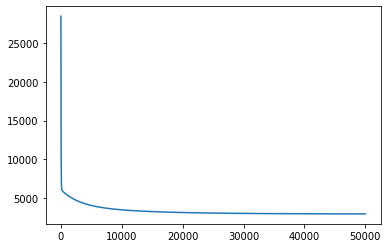

In [24]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [25]:
W, b

(array([  41.76351536, -203.14552658,  509.45203384,  325.01757251,
         -71.07674355, -119.05443155, -216.03908789,  144.37238011,
         376.69103238,  112.00711389]),
 151.373024058107)

In [26]:
# (10) test 데이터에 대한 성능 확인하기

In [27]:
# test 데이터에 대한 성능을 확인해주세요.

In [28]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2866.6831091278495

In [29]:
# (11) 정답 데이터와 예측한 데이터 시각화하기

In [30]:
# x축에는 X 데이터의 첫 번째 컬럼을,
# y축에는 정답인 target 데이터를 넣어서
# 모델이 예측한 데이터를 시각화해 주세요.

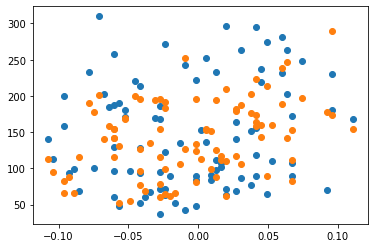

In [31]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [107]:
# 2-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [108]:
# 마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다.
# 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!

In [109]:
# 데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 
# 자전거의 대여량을 예측하는 문제입니다.

In [110]:
# 이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고,
# 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.

In [111]:
# (1) 데이터 가져오기

In [112]:
# 터미널에서 ~/data/data/bike-sharing-demand 경로에 
# train.csv 데이터를 train 변수로 가져 옵니다.

In [32]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [114]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고
# 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [115]:
# to_datetime 활용 : 링크 참조
# pandas datetime extract year month day 키워드로 검색해 보기

In [33]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [34]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [134]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [145]:
# sns.countplot 활용해서 시각화하기
# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

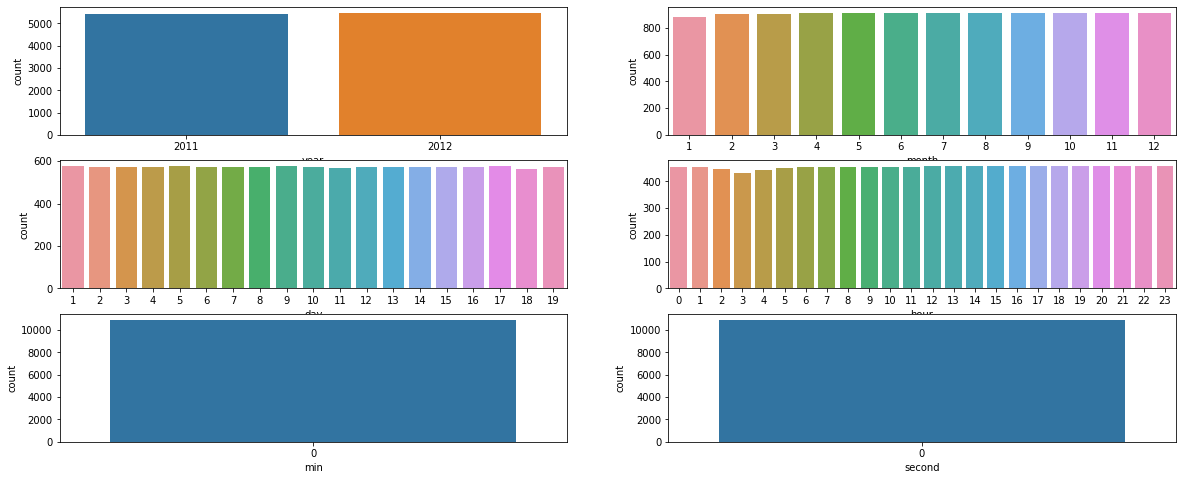

In [35]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 8))

plt.subplot(3, 2, 1)
sns.countplot(data=train, x='year')
plt.subplot(3, 2, 2)
sns.countplot(data=train, x='month')
plt.subplot(3, 2, 3)
sns.countplot(data=train, x='day')
plt.subplot(3, 2, 4)
sns.countplot(data=train, x='hour')
plt.subplot(3, 2, 5)
sns.countplot(data=train, x='min')
plt.subplot(3, 2, 6)
sns.countplot(data=train, x='second')
plt.show()

In [146]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [147]:
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다.
# 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.
# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [39]:
train.drop(['datetime', 'year', 'day', 'min', 'second', 'season', 'temp', 'casual', 'registered'], axis=1)

,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour
0,0,0,1,14.395,81,0.0000,16,1,0
1,0,0,1,13.635,80,0.0000,40,1,1
2,0,0,1,13.635,80,0.0000,32,1,2
3,0,0,1,14.395,75,0.0000,13,1,3
4,0,0,1,14.395,75,0.0000,1,1,4
...,...,...,...,...,...,...,...,...,...
10881,0,1,1,19.695,50,26.0027,336,12,19
10882,0,1,1,17.425,57,15.0013,241,12,20
10883,0,1,1,15.910,61,15.0013,168,12,21
10884,0,1,1,17.425,61,6.0032,129,12,22


In [41]:
X = train[['month', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour']].to_numpy()
y = train['count'].to_numpy()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 7) (8708,)
(2178, 7) (2178,)


In [43]:
# (5) LinearRegression 모델 학습

In [44]:
# sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [49]:
# 학습된 모델에 X_test를 입력해서 예측값 출력하기
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
# mse 값과 함께 rmse 값도 계산하기

In [50]:
predictions = model.predict(X_test)
predictions

array([287.73494418,   4.41126929, 243.38482918, ..., 268.38310208,
        -5.01578513, 206.5236416 ])

In [53]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

21680.434621465207

In [54]:
rmse = mean_squared_error(y_test, predictions) ** 0.5
rmse

147.24277442871417

In [55]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [56]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

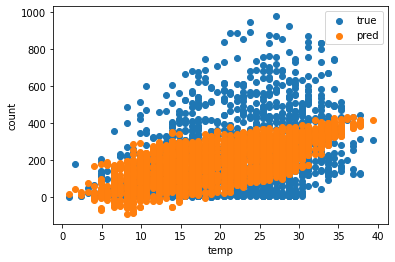

In [57]:
plt.scatter(X_test[:, 3], y_test, label="true")
plt.scatter(X_test[:, 3], predictions, label="pred")
plt.ylabel('count')
plt.xlabel('temp')
plt.legend()
plt.show()

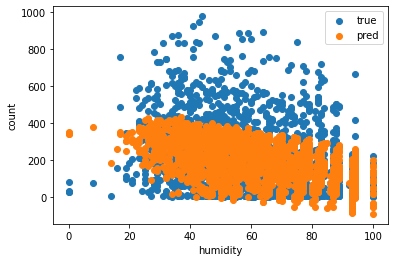

In [58]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.ylabel('count')
plt.xlabel('humidity')
plt.legend()
plt.show()